# Lecture 1. Supervised Learning for Regression Problems

## Part 2: ML and Causal Inference 

by Nadzeya Laurentsyeva @ nadzeya.laurentsyeva@econ.lmu.de

October 27, 2021


# Review of Part 1


## Focus: Supervised Learning Problems 

_Let $Y_i$ denote the outcome for unit $i$, and let $X_i$ denote the $K$-component vector of covariates. The conditional expectation: $ g(x) = E(Y_i | X_i = x) $. Our task is to estimate (learn) $g(\cdot)$ = find a mapping function by optimizing the parameters._

* Labeled data
<br>

* Parametric models
    
    <br>

* Types of problems
    * Regressions (e.g. OLS): $Y$ is quantitative
    * Classification (e.g. logistic regression): $Y$ is qualitative 
    
    

  





## Which algorithm is good? 

* Goal: Prediction out-of-sample (as new data arrives)
<br>

* Hence: care about the model's fit out-of-sample
    * Use sample-splitting: train sample to obtain the model's parameters; test sample to estimate performance 
    * Use K-fold cross-validation to proxy out-of-sample performance 
<br>


* Metric: MSE, $R^2$ for linear regressions; deviance - more generally
<br>

* Variance-Bias Trade-off 

$MSE = \sigma^2 + Variance(\hat{f}(x_0)) + Bias(\hat{f}(x_0))^2$
<br>

* Solution: Model regularization 
    * Model penalization (or shrinkage methods) $ \sum_i (y_i-x_i^T\beta)^2  + \lambda h(\beta) $ 
    * Idea: reduce variance by introducing a (small) bias
    


## Prediction properties seem to be great
<img src="prediction.png" style="height:200px">

## But can we use these methods for causal inference? 

Our true data-generation process:     $ y = 0.5x_1 + 67x_2 -1/3x_3 + 0.5x_4 - 40x_5 +\epsilon  $

and non-zero coefficients selected by Lasso
<img src="vars.png" style="height:200px">

* Bias due to penalization 
* How to construct confidence intervals? 

# Today: Double Machine Learning and Causal Inference 

## Formulation of the problem

We have the following empirical specification: 

$Y = D\theta_0 + g_0(Z) + U, E[U|Z,D] = 0$
where 

* $Y$ - outcome
* $D$ - policy/treatment variable with $\theta_0$ - the parameter of interest 
* $Z$ - (high-dimensional) vector of controls or confounders (nuisance parameters) in the sense that: 

$D = m_0(Z) + V, E[V|Z] = 0$

**A common task among economists**
* Select the relevant controls (theory/common sense) and argue that $\theta_0$ is causal conditional on controls

**Issues with this approach**
* True model specification? 
* Potentially a big set of controls (often $P>N$), including all of them is not feasible 

  $\rightarrow$ Omitted variable bias when we do not include relevant confounders and large standard errors when we include irrelevant controls
 
 $\rightarrow$ “Researcher degrees of freedom” and“p-hacking”. Researchers may consciously or unconsciously choose controls to generate the results they want

## Why can Supervised Learning methods help? 

* Data-driven model selection: controls and specification
* Automatic RA 

Great! So, let's just run a Lasso regression of $Y$ on $D$ (not subject to regularization) and all possible controls... 

Why won't such a naive approach work? 
* We might miss controls that have a strong predictive power for the causal variable, but only a small effect on the outcome 
Similarly: if we only consider the regression of the causal variable against the controls, we might miss controls that have a strong predictive power for the outcome, but only a moderately sized effect on the causal variable.

## Literature 

* **Dynamic field of research**
<br>

* **2010-2015 Belloni/Chernozhukov/Hansen et al. papers**
    * Post-double selection 
    * Double orthogonalization 
    * Selection of best instruments 
    * Focus on penalised regressions; applications to partially linear models; generalizations to ATE/ATT and heterogeneous treatment effects 
    * pdslasso package in Stata 14+
    
(Beloni et al. 2014 JEP paper is a good start to the general idea)
    
<br>   

* **2018 Chernozhukov et al. "Double/debiased machine learning for treatment and structural parameters"**
    * Generalization of the orthogonalization idea; use of a much broader set of ML tools to estimate nuisance parameters
    * Cross-fitting idea: split the sample to reduce the bias due to overfitting - use one part of data to estimate nuisance parameters and another to estimate the parameter of interest  
    * Applications to partially linear models, models with instruments, ATE/ATT/LATE. 
    * Double machine learning package in Python https://docs.doubleml.org/stable/index.html, tetelasso package from Stata16+
        * we will work with them after learning about CART and Random Forests

<br>

* **Related field** 
    * Rapidly expanding body of work on estimation of treatment effects under unconfoundedness using ML methods
    * Note: Double ML and Double/y Robust methods are two different things. The latter comes from the literature on estimating treatment effects. 
    

## Double Machine Learning Solutions
### Post-Double-Selection Lasso (Belloni et al. 2014 Restud)

1. Drop d. Use Lasso to see which controls are important for y --> A. 
2. Drop y. Use Lasso to see which controls are important for d --> B.
3. Estimate with OLS $y = f(d, A+B)$ 

Note: parameter for d is causal, but do not overinterpret coefficients for A and B controls!

### Alternative: Double-Orthogonalization 

1. Run a regression of y on controls with Lasso; use Lasso or Post-Lasso coefficients to obtain residuls
2. Run a regression of d on controls with Lasso; again obtain residuals
3. Run OLS of y resid. on d resid. 
4. No temptation to overinterpret controls, as we drop them! 

## Why does it work? 
* Immunisation property - we use prediction to identify controls=nuisance parameters, moderate model selection mistakes of the LASSO do not affect the asymptotic distribution of the causal estimator. Any non-selected regressor has a small correlation with the outcome and with the main independent variable, which allows for asymptoticaly valid inference. 
    * Further strengthened with cross-fitting in Chernozhukov et al. (2018)

<br>

* Irrepresentable condition - we do not aim at giving causal interpretation to controls

## Tutorial 3: Part 2 Double Machine Learning


Many of you might know about the famous Donohue and Levitt (2001, QJE) paper on the Impact of legalised abortion and crime. 
https://pricetheory.uchicago.edu/levitt/Papers/DonohueLevittTheImpactOfLegalized2001.pdf

Our task here would be to do a robustness check: 
* Our (potential) causal variable of interest are "effective" abortion rates (varying at the state-year level)
* The authors include state and year fixed effects, as well as a set of reasonable controls to account for potential endogeneity. However are all the necessary controls included? 
* We will try out the pdslasso package in Stata to check that. 
* Is the causal variable still significant? 

In [3]:
# for some reason for me ipystata suddenly stopped working ... 
# I installed an alternative: https://kylebarron.dev/stata_kernel/using_stata_kernel/configuration/
# For this, I don't need to import packages but just change to Stata Kernel
# you can also simply run your code in Stata if you don't need to use it with Jupyter notebook in the future. 

In [1]:
cd "C:\Users\nadzeya\Documents\teaching\Data_science_2021_ws\03 Model regularization\Data"
import delimited "levitt_ex.dat", clear // original dataset provided by Levitt and Donohue
xtset state year


C:\Users\nadzeya\Documents\teaching\Data_science_2021_ws\03 Model regularization
> \Data

(17 vars, 1,734 obs)

       panel variable:  statenum (strongly balanced)
        time variable:  year, 66 to 99
                delta:  1 unit


In [2]:
%browse

,statenum,year,popul,lpc_viol,lpc_prop,lpc_murd,efamurd,efaviol,efaprop,xxprison,xxpolice,xxunemp,xxincome,xxpover,xxafdc15,xxgunlaw,xxbeer
1,1,66,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.
2,1,67,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.
3,1,68,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.
4,1,69,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.
5,1,70,3452,.,.,.,.,.,.,.,.,.,.,.,.,1,.
6,1,71,3487,.,.,.,.,.,.,.,.,.,.,.,.,1,.
7,1,72,3539,1.133505,2.9942901,-1.965024,.,.,.,.,.,.04324,9.498476,.,.,1,.
8,1,73,3580,1.241527,3.0940721,-2.0346501,.,.,.,.025939301,.56681538,.04493,9.550107,.,.,1,.
9,1,74,3627,1.302211,3.2546339,-1.912027,.,.,.,.031076301,.58669978,.056170002,9.5371628,.,.,1,.
10,1,75,3679,1.3506711,3.4095521,-1.852554,.,.,.,.1606285,.67618579,.077140003,9.5400314,.,.,1,.


In [2]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    statenum |      1,734          26    14.72385          1         51
        year |      1,734        82.5    9.813539         66         99
       popul |      1,530    4657.443    5070.719        304    33145.1
    lpc_viol |      1,320    1.351806    .6507722  -.7774249   3.374785
    lpc_prop |      1,320    3.754711    .2941388   2.561134   4.560084
-------------+---------------------------------------------------------
    lpc_murd |      1,320   -2.791588    .6941202  -6.458338  -.2089352
     efamurd |        663    .3704813    .6111769   .0000456   6.219058
     efaviol |        663     .578164    .7925107    .000593   7.509375
     efaprop |        663    1.022986    1.172821   .0026488   9.765327
    xxprison |      1,275    .4213807    .7069605  -1.593813   2.955367
-------------+-------------------------------------------------

In [3]:
* I replicate the original regressions as in the paper
// here I do it for property crimes: lpc_prop and corresponding abortion rates efaprop
// weighted regressions; corrected for ar1 process 
qui xtgls lpc_prop i.year i.statenum efaprop ///
  [aw = popul], corr(ar1) 
est store Paper_s

xtgls lpc_prop i.year i.statenum efaprop ///
l.xxprison l.xxpolice xxunemp xxincome xxpover xxafdc15 xxgunlaw xxbeer ///
  [aw = popul], corr(ar1) 
qui est store Paper_c

esttab Paper_s Paper_c, keep(efaprop) ///
 mtitles(Paper_s Paper_c)

* in first differences as in Belloni et al. (2014) 
qui reg d.lpc_prop i.year d.efaprop ///
d2.xxprison d2.xxpolice d.xxunemp d.xxincome d.xxpover d.xxafdc15 ///
d.xxgunlaw d.xxbeer ///
  [aw = popul], cluster(statenum) 
est store Baseline

* in first differences with ar process
qui xtgls d.lpc_prop i.year d.efaprop ///
d2.xxprison d2.xxpolice d.xxunemp d.xxincome d.xxpover d.xxafdc15 ///
d.xxgunlaw d.xxbeer ///
  [aw = popul], corr(ar1)
est store Baseline_ar1

esttab Baseline Baseline_ar1, keep(D.efaprop) ///
 mtitles(Baseline Baseline_ar1)




(sum of wgt is   3.2822e+06)

Cross-sectional time-series FGLS regression

Coefficients:  generalized least squares
Panels:        homoskedastic
Correlation:   common AR(1) coefficient for all panels  (0.5120)

Estimated covariances      =         1          Number of obs     =        663
Estimated autocorrelations =         1          Number of groups  =         51
Estimated coefficients     =        72          Time periods      =         13
                                                Wald chi2(71)     =    5636.06
                                                Prob > chi2       =     0.0000

------------------------------------------------------------------------------
    lpc_prop |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        year |
         86  |   .0487602    .008207     5.94   0.000     .0326748    .0648457
         87  |   .0981266   .0110246     8.90   0.000     .

**Paper**

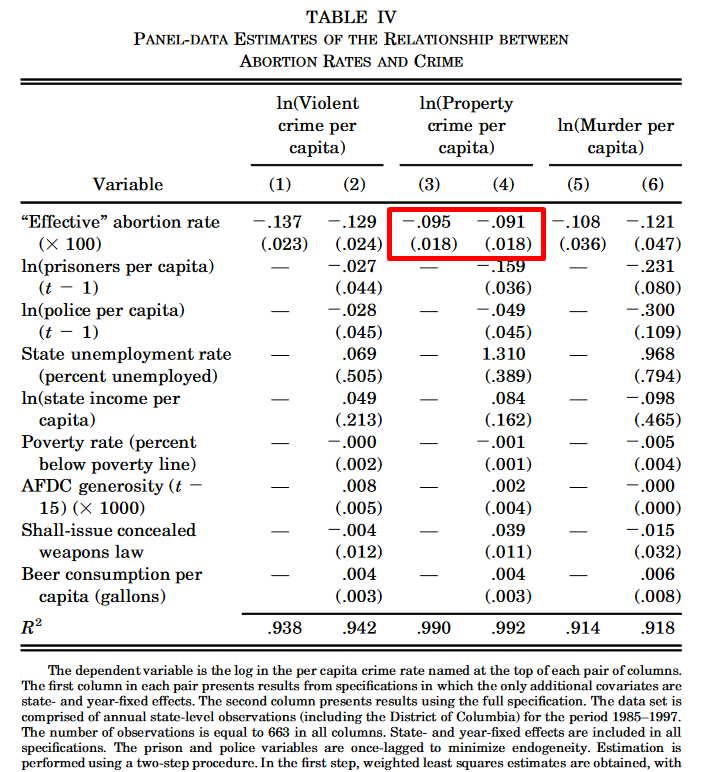

In [4]:
// now let's add more controls
// initial crime rates and income level (as of 1980
// initial crime rates and income growth (1973-1983)
foreach x in lpc_prop xxincome {
gen i = `x' if year == 80
gen g = d.`x' if inrange(year, 73, 83)
bys state: egen i_`x' = mean(i)
bys state: egen g_`x' = mean(g)
drop i g
}

// baseline controls squared
global bl = "xxprison xxpolice xxunemp xxincome xxpover xxafdc15 xxgunlaw xxbeer"
foreach x in $bl {
gen `x'_2 = `x'^2
}

foreach x in xxunemp xxincome xxpover xxafdc15 xxgunlaw xxbeer {
gen d_`x' = d.`x'
gen d_`x'_2 = d.`x'_2
}
foreach x in xxprison xxpolice {
gen d2_`x' = d2.`x'
gen d2_`x'_2 = d2.`x'_2
}

// interaction between initial values and time trend 
foreach x of varlist i_* g_* {
gen t_`x' = year*`x'
} 


(1,683 missing values generated)
(1,180 missing values generated)
(1,683 missing values generated)
(1,173 missing values generated)


(459 missing values generated)
(459 missing values generated)
(408 missing values generated)
(408 missing values generated)
(816 missing values generated)
(1,020 missing values generated)
(51 missing values generated)
(1,020 missing values generated)

(459 missing values generated)
(459 missing values generated)
(459 missing values generated)
(459 missing values generated)
(867 missing values generated)
(867 missing values generated)
(1,071 missing values generated)
(1,071 missing values generated)
(102 missing values generated)
(102 missing values generated)
(1,071 missing values generated)
(1,071 missing values generated)

(561 missing values generated)
(561 missing values generated)
(561 missing values generated)
(561 missing values generated)




<div class="alert alert-block alert-info">
<b>Question :</b> Any other ideas for additional controls? 
</div>

In [5]:

/* naive approach: apply lasso to the regression as a whole, specifying
that the variable of interest (d) is not subject to selection
*/ 

// available cvlasso, lasso2 (based on information criteria), rlasso (theory based)
// I use rlasso because it allows for weighted regressions

rlasso d.lpc_prop i.year d.efaprop ///
d_* d2_* i_* g_* t_*   [aw = popul], ///
pnotpen(d.efaprop) partial(i.year)

est store Naive

esttab Baseline Baseline_ar1 Naive, keep(D.efaprop) ///
 mtitles(Baseline Baseline_ar1 Naive)


(sum of wgt is     3.0443e+06)

---------------------------------------------------
         Selected |           Lasso   Post-est OLS
------------------+--------------------------------
          efaprop |
              D1. |*     -0.0367078      0.0003012
                  |
      d_xxunemp_2 |       2.6376289      9.2493856
     t_i_xxincome |      -0.0005382     -0.0011513
------------------+--------------------------------
   Partialled-out*|
------------------+--------------------------------
                  |
             year |
              86  |       (omitted)      (omitted)
              87  |      -0.0135899     -0.0041031
              88  |      -0.0100423      0.0031962
              89  |      -0.0070599      0.0074211
              90  |      -0.0175440     -0.0016414
              91  |       0.0025002      0.0149460
              92  |      -0.0537007     -0.0315448
              93  |      -0.0320895      0.0083280
              94  |      -0.0083862      0.0396

In [6]:

*Post-Double-Selection Lasso
/*
1. Drop d. Use Lasso to see which controls are important for y --> A. 
2. Drop y. Use Lasso to see which controls are important for d --> B.
3. Estimate with OLS y = f(d, A+B). 
Note: parameter for d is causal, but do not overinterpret coefficients for A and B controls!
*/

*Alternative: Double-Orthogonalization 
/*
1. Run a regression of y on controls with Lasso; use Lasso or Post-Lasso coefficients to obtain residuls
2. Run a regression of d on controls with Lasso; again obtain residuals
3. Run OLS of y resid. on d resid. 
4. No temptation to overinterpret controls! 
*/ 

// * Note, I specified controls in a different way compared to Belloni et al. paper 

pdslasso d.lpc_prop d.efaprop  ///
(d_* d2_* i_* g_* t_* i.year) [aw = popul], partial(i.year) cluster(statenum) rlasso 
est store PDS

esttab Baseline Baseline_ar1 Naive PDS, keep(D.efaprop) ///
 mtitles(Baseline Baseline_ar1 Naive PDS)



(sum of wgt is     3.0443e+06)
Partialling out unpenalized controls...
1.  (PDS/CHS) Selecting HD controls for dep var D.lpc_prop...
Selected: i_xxincome
2.  (PDS/CHS) Selecting HD controls for exog regressor D.efaprop...
Selected: d_xxunemp d_xxbeer t_i_lpc_prop t_i_xxincome


Estimation results:

Specification:
Regularization method:                 lasso
Penalty loadings:                      cluster-lasso
Number of observations:                612
Number of clusters:                     51
Exogenous (1):                         D.efaprop
High-dim controls (24):                d_xxunemp d_xxunemp_2 d_xxincome
                                       d_xxincome_2 d_xxpover d_xxpover_2
                                       d_xxafdc15 d_xxafdc15_2 d_xxgunlaw
                                       d_xxgunlaw_2 d_xxbeer d_xxbeer_2
                                       d2_xxprison d2_xxprison_2 d2_xxpolice
                                       d2_xxpolice_2 i_lpc_prop i_xxincome
       

## Resources 
* Athey and Imbens (2019) Machine Learning Methods Economists Should Know About
* Matt Taddy (2019) Business Data Science: Combining Machine Learning and Economics to Optimize, Automate, and Accelerate Business Decisions. McGraw-Hill Education
* Belloni, Alexandre, Victor Chernozhukov, and Christian Hansen. "High-dimensional methods and inference on structural and treatment effects." Journal of Economic Perspectives 28.2 (2014): 29-50.
* Belloni et al. (2014) "Inference on Treatment Effects after Selection among High-Dimensional Controls" Review of Economic Studies. 
* Chernozhukov et al. (2018) "Double/debiased machine learning for treatment and structural parameters." Econometrica
* [Stata packages for Lasso with good theory slides](https://www.stata.com/meeting/uk18/slides/uk18_Ahrens.pdf)